<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0/blob/master/12_TinyImageNet/TinyImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TinyImageNet on ResNet18

---



## Install the PySodium Library

In [2]:
!pip install --upgrade git+https://github.com/satyajitghana/PySodium.git#egg=py-sodium

  Cloning https://github.com/satyajitghana/PySodium.git to /tmp/pip-install-1g0w04fj/py-sodium
  Running command git clone -q https://github.com/satyajitghana/PySodium.git /tmp/pip-install-1g0w04fj/py-sodium
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 634kB 13.7MB/s 
  Created wheel for py-sodium: filename=py_sodium-0.0.2-cp36-none-any.whl size=24916 sha256=1575776c7348ed1c4b449e31204ca57a016f252043d534e7868c1f4f4d4d01a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-t7dicmza/wheels/ed/b2/24/860b8aa92c98c5b8e1e724d604e3c4bf4039ab8bb7f66bcc82
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=58d7ed4807524f46c28e65ce6c0b70afd4b126f1a1b9e02c49b707a1c49a7462
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=96c494c91aef9ec98844094a63b737a2a6af9ae02f9eabe2889

## Create a config file

In [11]:
%%writefile cifar.yml
name: TinyImageNet
save_dir: saved/
seed: 1
target_device: 0

arch:
    type: TinyImageNetS12Model
    args: {}

augmentation:
    type: TinyImageNetAlbumentations
    args: {}

data_loader:
    type: TinyImageNetDataLoader
    args:
        batch_size: 256
        data_dir: data/
        nworkers: 6
        shuffle: True

lr_finder:
    epochs: 20

criterion: cross_entropy_loss

lr_scheduler:
    max_lr_at_epoch: 12
    type: OneCycleLR
    args:
        max_lr: 0.1

optimizer:
    type: SGD
    args:
        lr: 0.001
        momentum: 0.95
        weight_decay: 0.0005

training:
    epochs: 50

Overwriting cifar.yml


## Import sodium

In [0]:
from sodium.utils import load_config
import sodium.runner as runner

## Create a runner with the config and train the model

In [13]:
!nvidia-smi

Sat Apr 25 09:45:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    38W / 250W |  12635MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [14]:
config = load_config('cifar.yml')
runner = runner.Runner(config)
runner.setup_train(tsai_mode=True)

[ 2020-04-25 09:45:20,978 - sodium.sodium.runner ] INFO: Training Config
[ 2020-04-25 09:45:20,983 - sodium.sodium.runner ] INFO: {'arch': {'args': {}, 'type': 'TinyImageNetS12Model'},
[ 2020-04-25 09:45:20,983 - sodium.sodium.runner ] INFO:  'augmentation': {'args': {}, 'type': 'TinyImageNetAlbumentations'},
[ 2020-04-25 09:45:20,984 - sodium.sodium.runner ] INFO:  'criterion': 'cross_entropy_loss',
[ 2020-04-25 09:45:20,986 - sodium.sodium.runner ] INFO:  'data_loader': {'args': {'batch_size': 256,
[ 2020-04-25 09:45:20,987 - sodium.sodium.runner ] INFO:                           'data_dir': 'data/',
[ 2020-04-25 09:45:20,988 - sodium.sodium.runner ] INFO:                           'nworkers': 6,
[ 2020-04-25 09:45:20,993 - sodium.sodium.runner ] INFO:                           'shuffle': True},
[ 2020-04-25 09:45:20,997 - sodium.sodium.runner ] INFO:                  'type': 'TinyImageNetDataLoader'},
[ 2020-04-25 09:45:20,997 - sodium.sodium.runner ] INFO:  'lr_finder': {'epochs': 

# Model Summary

In [15]:
runner.print_summary(input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

# Model Visualization

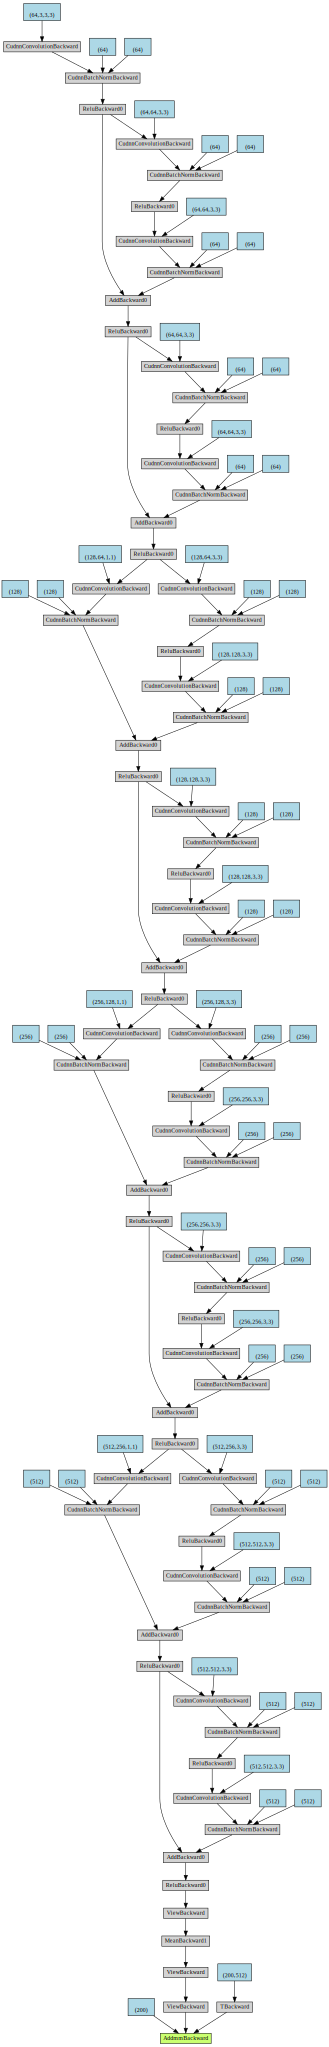

In [16]:
runner.print_visualization(input_size=(3, 64, 64))

# Find the Optimal LR

[ 2020-04-25 09:45:22,388 - sodium.sodium.runner ] INFO: finding the best learning rate
[ 2020-04-25 09:45:22,389 - sodium.sodium.utils.config ] INFO: Building: sodium.tsai_model.TinyImageNetS12Model
[ 2020-04-25 09:45:22,496 - sodium.sodium.utils.config ] INFO: Using device 0 of available devices [0]
[ 2020-04-25 09:45:22,513 - sodium.sodium.utils.config ] INFO: Building: torch.optim.SGD
[ 2020-04-25 09:45:22,522 - sodium.sodium.runner ] INFO: Running LR-Test for 20 epochs



Learning rate search finished. See the graph with {finder_name}.plot()
[ 2020-04-25 09:52:21,282 - sodium.sodium.runner ] INFO: sorted lrs : [0.88012, 0.89385625, 0.8101900000000001, 0.9025974999999999, 0.8926075, 0.89135875, 0.905095, 0.8988512500000001, 0.87887125, 0.90134875]
[ 2020-04-25 09:52:21,284 - sodium.sodium.runner ] INFO: found the best lr : 0.88012
[ 2020-04-25 09:52:21,288 - sodium.sodium.runner ] INFO: plotting lr_finder


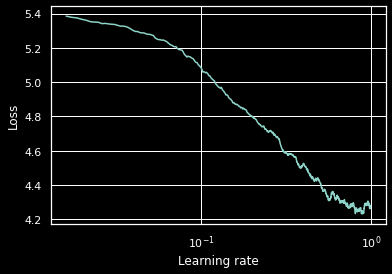

In [17]:
runner.find_lr()

In [18]:
runner.train(use_bestlr=True)

[ 2020-04-25 09:58:05,318 - sodium.sodium.runner ] INFO: using max_lr : 0.88012
[ 2020-04-25 09:58:05,319 - sodium.sodium.runner ] INFO: using min_lr : 0.029337333333333333
[ 2020-04-25 09:58:05,319 - sodium.sodium.runner ] INFO: using initial_lr : 0.044006
[ 2020-04-25 09:58:05,320 - sodium.sodium.base.base_trainer ] INFO: Starting training ...
[ 2020-04-25 09:58:05,321 - sodium.sodium.base.base_trainer ] INFO: Training the model for 50 epochs
[ 2020-04-25 09:58:05,323 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 1
[ 2020-04-25 09:58:05,324 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.088012



[ 2020-04-25 10:01:30,277 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 1
[ 2020-04-25 10:01:36,803 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.42099200, Accuracy: 9.22 (922/10000)
[ 2020-04-25 10:01:36,804 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 2
[ 2020-04-25 10:01:36,805 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.01893286070742428



[ 2020-04-25 10:05:02,151 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 2
[ 2020-04-25 10:05:08,698 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.18607244, Accuracy: 14.19 (1419/10000)
[ 2020-04-25 10:05:08,699 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 3
[ 2020-04-25 10:05:08,702 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.06271336161293528



[ 2020-04-25 10:08:33,899 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 3
[ 2020-04-25 10:08:40,424 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.86336145, Accuracy: 16.60 (1660/10000)
[ 2020-04-25 10:08:40,425 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 4
[ 2020-04-25 10:08:40,427 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.1323566690329132



[ 2020-04-25 10:12:05,601 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 4
[ 2020-04-25 10:12:11,961 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.54117532, Accuracy: 21.08 (2108/10000)
[ 2020-04-25 10:12:11,962 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 5
[ 2020-04-25 10:12:11,963 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.22311469453697474



[ 2020-04-25 10:15:36,770 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 5
[ 2020-04-25 10:15:43,235 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.58125606, Accuracy: 21.56 (2156/10000)
[ 2020-04-25 10:15:43,236 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 6
[ 2020-04-25 10:15:43,237 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.32879980650875207



[ 2020-04-25 10:19:08,092 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 6
[ 2020-04-25 10:19:14,496 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.83382339, Accuracy: 19.89 (1989/10000)
[ 2020-04-25 10:19:14,497 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 7
[ 2020-04-25 10:19:14,498 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.44220668578683786



[ 2020-04-25 10:22:39,720 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 7
[ 2020-04-25 10:22:46,243 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.85837231, Accuracy: 11.60 (1160/10000)
[ 2020-04-25 10:22:46,245 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 8
[ 2020-04-25 10:22:46,248 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.5556035644329436



[ 2020-04-25 10:26:11,211 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 8
[ 2020-04-25 10:26:17,707 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.69441210, Accuracy: 19.91 (1991/10000)
[ 2020-04-25 10:26:17,708 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 9
[ 2020-04-25 10:26:17,709 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.6612593563242595



[ 2020-04-25 10:29:42,566 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 9
[ 2020-04-25 10:29:49,010 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.22512736, Accuracy: 18.08 (1808/10000)
[ 2020-04-25 10:29:49,011 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 10
[ 2020-04-25 10:29:49,011 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.7519707412615177



[ 2020-04-25 10:33:13,849 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 10
[ 2020-04-25 10:33:20,353 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.48199420, Accuracy: 17.37 (1737/10000)
[ 2020-04-25 10:33:20,354 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 11
[ 2020-04-25 10:33:20,355 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.8215532674534315



[ 2020-04-25 10:36:45,511 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 11
[ 2020-04-25 10:36:52,000 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.99904921, Accuracy: 18.04 (1804/10000)
[ 2020-04-25 10:36:52,001 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 12
[ 2020-04-25 10:36:52,002 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.8652629903659432



[ 2020-04-25 10:40:17,144 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 12
[ 2020-04-25 10:40:23,782 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.64938285, Accuracy: 21.11 (2111/10000)
[ 2020-04-25 10:40:23,784 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 13
[ 2020-04-25 10:40:23,784 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.880119990490938



[ 2020-04-25 10:43:48,983 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 13
[ 2020-04-25 10:43:55,469 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.91002062, Accuracy: 17.91 (1791/10000)
[ 2020-04-25 10:43:55,471 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 14
[ 2020-04-25 10:43:55,472 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.8786596358310124



[ 2020-04-25 10:47:20,342 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 14
[ 2020-04-25 10:47:26,797 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.07497526, Accuracy: 16.77 (1677/10000)
[ 2020-04-25 10:47:26,798 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 15
[ 2020-04-25 10:47:26,799 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.8743034027913466



[ 2020-04-25 10:50:51,593 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 15
[ 2020-04-25 10:50:58,041 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.32138582, Accuracy: 24.95 (2495/10000)
[ 2020-04-25 10:50:58,042 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 16
[ 2020-04-25 10:50:58,046 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.8670810488607639



[ 2020-04-25 10:54:22,989 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 16
[ 2020-04-25 10:54:29,381 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.49071807, Accuracy: 14.18 (1418/10000)
[ 2020-04-25 10:54:29,383 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 17
[ 2020-04-25 10:54:29,386 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.8570419100399805



[ 2020-04-25 10:57:53,954 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 17
[ 2020-04-25 10:58:00,533 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.49952608, Accuracy: 13.04 (1304/10000)
[ 2020-04-25 10:58:00,534 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 18
[ 2020-04-25 10:58:00,535 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.8442545638266955



[ 2020-04-25 11:01:24,979 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 18
[ 2020-04-25 11:01:31,405 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.99799645, Accuracy: 17.82 (1782/10000)
[ 2020-04-25 11:01:31,406 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 19
[ 2020-04-25 11:01:31,409 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.8288063607617439



[ 2020-04-25 11:04:55,972 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 19
[ 2020-04-25 11:05:02,414 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.10520263, Accuracy: 18.59 (1859/10000)
[ 2020-04-25 11:05:02,415 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 20
[ 2020-04-25 11:05:02,416 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.8108028277363309



[ 2020-04-25 11:08:27,182 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 20
[ 2020-04-25 11:08:33,659 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.59682178, Accuracy: 20.96 (2096/10000)
[ 2020-04-25 11:08:33,660 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 21
[ 2020-04-25 11:08:33,664 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.790366947136363



[ 2020-04-25 11:11:58,446 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 21
[ 2020-04-25 11:12:04,850 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.90725722, Accuracy: 19.44 (1944/10000)
[ 2020-04-25 11:12:04,852 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 22
[ 2020-04-25 11:12:04,853 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.7676383167480479



[ 2020-04-25 11:15:29,713 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 22
[ 2020-04-25 11:15:36,176 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.00625031, Accuracy: 20.00 (2000/10000)
[ 2020-04-25 11:15:36,177 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 23
[ 2020-04-25 11:15:36,178 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.742772196163466



[ 2020-04-25 11:19:01,052 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 23
[ 2020-04-25 11:19:07,566 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.02497289, Accuracy: 17.73 (1773/10000)
[ 2020-04-25 11:19:07,568 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 24
[ 2020-04-25 11:19:07,573 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.7159384462001243



[ 2020-04-25 11:22:32,341 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 24
[ 2020-04-25 11:22:38,843 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.83766529, Accuracy: 22.69 (2269/10000)
[ 2020-04-25 11:22:38,845 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 25
[ 2020-04-25 11:22:38,846 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.6873203685793372



[ 2020-04-25 11:26:03,553 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 25
[ 2020-04-25 11:26:10,108 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.70960667, Accuracy: 21.64 (2164/10000)
[ 2020-04-25 11:26:10,110 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 26
[ 2020-04-25 11:26:10,114 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.6571134537896035



[ 2020-04-25 11:29:34,974 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 26
[ 2020-04-25 11:29:41,437 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.66679939, Accuracy: 22.22 (2222/10000)
[ 2020-04-25 11:29:41,438 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 27
[ 2020-04-25 11:29:41,441 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.6255240456883457



[ 2020-04-25 11:33:06,453 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 27
[ 2020-04-25 11:33:12,895 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.31019386, Accuracy: 26.19 (2619/10000)
[ 2020-04-25 11:33:12,896 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 28
[ 2020-04-25 11:33:12,897 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.5927679319641339



[ 2020-04-25 11:36:37,753 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 28
[ 2020-04-25 11:36:44,446 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.81689505, Accuracy: 24.85 (2485/10000)
[ 2020-04-25 11:36:44,448 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 29
[ 2020-04-25 11:36:44,448 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.5590688700879669



[ 2020-04-25 11:40:09,175 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 29
[ 2020-04-25 11:40:15,723 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.50030048, Accuracy: 24.04 (2404/10000)
[ 2020-04-25 11:40:15,724 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 30
[ 2020-04-25 11:40:15,725 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.5246570588228578



[ 2020-04-25 11:43:40,526 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 30
[ 2020-04-25 11:43:46,981 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.83438348, Accuracy: 18.19 (1819/10000)
[ 2020-04-25 11:43:46,982 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 31
[ 2020-04-25 11:43:46,985 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.48976756573286545



[ 2020-04-25 11:47:11,434 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 31
[ 2020-04-25 11:47:17,895 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.29409217, Accuracy: 26.40 (2640/10000)
[ 2020-04-25 11:47:17,896 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 32
[ 2020-04-25 11:47:17,900 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.45463872143327444



[ 2020-04-25 11:50:42,683 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 32
[ 2020-04-25 11:50:49,154 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.31844508, Accuracy: 26.57 (2657/10000)
[ 2020-04-25 11:50:49,155 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 33
[ 2020-04-25 11:50:49,156 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.4195104915508307



[ 2020-04-25 11:54:13,998 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 33
[ 2020-04-25 11:54:20,544 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.33665248, Accuracy: 26.75 (2675/10000)
[ 2020-04-25 11:54:20,545 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 34
[ 2020-04-25 11:54:20,548 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.384622837515188



[ 2020-04-25 11:57:45,610 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 34
[ 2020-04-25 11:57:52,087 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 4.12674762, Accuracy: 19.74 (1974/10000)
[ 2020-04-25 11:57:52,088 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 35
[ 2020-04-25 11:57:52,092 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.35021407737902555



[ 2020-04-25 12:01:16,625 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 35
[ 2020-04-25 12:01:23,149 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.23687593, Accuracy: 28.03 (2803/10000)
[ 2020-04-25 12:01:23,150 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 36
[ 2020-04-25 12:01:23,150 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.31651925786409696



[ 2020-04-25 12:04:47,979 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 36
[ 2020-04-25 12:04:54,382 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.22209816, Accuracy: 29.15 (2915/10000)
[ 2020-04-25 12:04:54,383 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 37
[ 2020-04-25 12:04:54,383 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.28376854875378665



[ 2020-04-25 12:08:19,215 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 37
[ 2020-04-25 12:08:25,778 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.27647808, Accuracy: 28.82 (2882/10000)
[ 2020-04-25 12:08:25,780 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 38
[ 2020-04-25 12:08:25,780 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.25218567060010044



[ 2020-04-25 12:11:50,419 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 38
[ 2020-04-25 12:11:56,907 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 2.96370881, Accuracy: 33.08 (3308/10000)
[ 2020-04-25 12:11:56,908 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 39
[ 2020-04-25 12:11:56,909 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.2219863664854451



[ 2020-04-25 12:15:21,621 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 39
[ 2020-04-25 12:15:28,240 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 2.79126683, Accuracy: 34.78 (3478/10000)
[ 2020-04-25 12:15:28,241 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 40
[ 2020-04-25 12:15:28,241 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.19337692827861513



[ 2020-04-25 12:18:52,704 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 40
[ 2020-04-25 12:18:59,127 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 3.18704022, Accuracy: 29.44 (2944/10000)
[ 2020-04-25 12:18:59,128 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 41
[ 2020-04-25 12:18:59,129 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.16655278745215185



[ 2020-04-25 12:22:23,698 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 41
[ 2020-04-25 12:22:30,173 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 2.52484237, Accuracy: 39.48 (3948/10000)
[ 2020-04-25 12:22:30,174 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 42
[ 2020-04-25 12:22:30,174 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.14169718008722113



[ 2020-04-25 12:25:54,899 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 42
[ 2020-04-25 12:26:01,424 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 2.65364262, Accuracy: 37.39 (3739/10000)
[ 2020-04-25 12:26:01,426 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 43
[ 2020-04-25 12:26:01,429 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.1189798951853796



[ 2020-04-25 12:29:26,025 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 43
[ 2020-04-25 12:29:32,566 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 2.37038433, Accuracy: 43.54 (4354/10000)
[ 2020-04-25 12:29:32,568 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 44
[ 2020-04-25 12:29:32,568 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.09855611483753068



[ 2020-04-25 12:32:57,622 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 44
[ 2020-04-25 12:33:04,223 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 2.45494969, Accuracy: 42.86 (4286/10000)
[ 2020-04-25 12:33:04,224 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 45
[ 2020-04-25 12:33:04,227 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.08056535417289122



[ 2020-04-25 12:36:29,145 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 45
[ 2020-04-25 12:36:35,714 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 2.45615101, Accuracy: 41.90 (4190/10000)
[ 2020-04-25 12:36:35,715 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 46
[ 2020-04-25 12:36:35,716 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.06513050832919189



[ 2020-04-25 12:40:00,580 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 46
[ 2020-04-25 12:40:07,174 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 2.17259356, Accuracy: 47.59 (4759/10000)
[ 2020-04-25 12:40:07,175 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 47
[ 2020-04-25 12:40:07,176 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.0523570129542729



[ 2020-04-25 12:43:31,718 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 47
[ 2020-04-25 12:43:38,145 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 2.03595825, Accuracy: 49.69 (4969/10000)
[ 2020-04-25 12:43:38,146 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 48
[ 2020-04-25 12:43:38,150 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.04233212397369885



[ 2020-04-25 12:47:02,748 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 48
[ 2020-04-25 12:47:09,344 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 2.04124982, Accuracy: 50.92 (5092/10000)
[ 2020-04-25 12:47:09,345 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 49
[ 2020-04-25 12:47:09,346 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.03512432154431092



[ 2020-04-25 12:50:34,067 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 49
[ 2020-04-25 12:50:40,540 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.88339452, Accuracy: 53.40 (5340/10000)
[ 2020-04-25 12:50:40,541 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 50
[ 2020-04-25 12:50:40,542 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.030782842265317186



[ 2020-04-25 12:54:05,173 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 50
[ 2020-04-25 12:54:11,607 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.88097278, Accuracy: 53.66 (5366/10000)
[ 2020-04-25 12:54:11,609 - sodium.sodium.runner ] INFO: Finished!


## Plot the metrics

[ 2020-04-25 12:54:16,277 - sodium.sodium.runner ] INFO: Plotting Metrics...


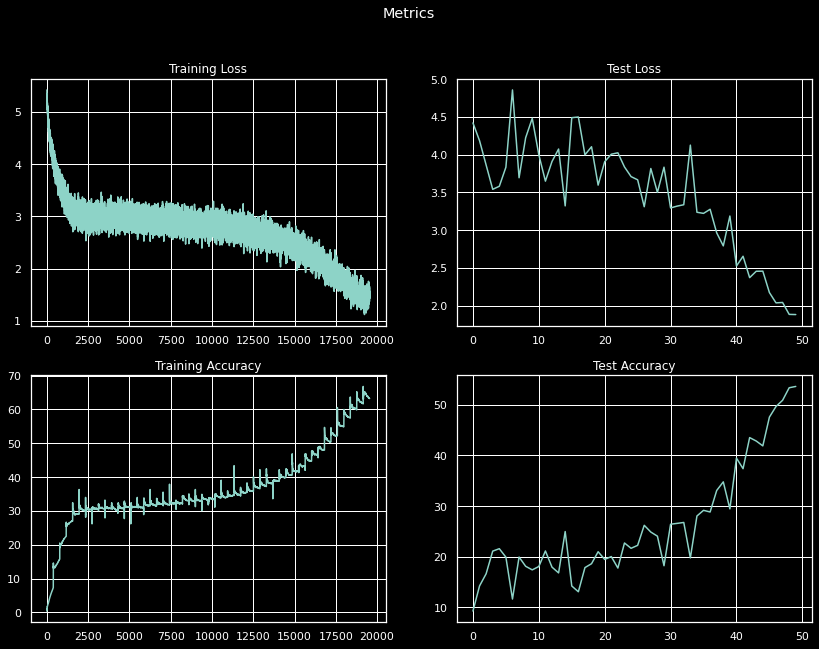

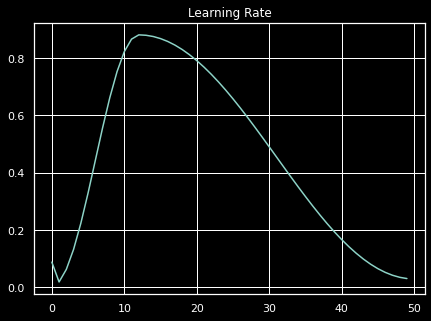

In [19]:
runner.plot_metrics()